# Machine learning program for determining if a person has diabetes or not.
## Project information
The goal of this program is to determine if a person has type 2 diabetes or if he does  
does not have type 2 diabetes. To help us do this we will use a regression dataset,  
which contains 442 people, and each person has these 10 features:  
- Age
- Sex
- BMI
- Blood pressure
- Six blood serum measurement

Each of these 10 features is used as an indicator for type 2 diabetes progression  
after one year. If the progression identifier is above 140, it means that a person  
is going to get type 2 diabetes.

## Loading of libaries
For this program i use different libraries such as:
- Numpy
- Matplotlib
- Sklearn
- Tensorflow
- Keras
- Pandas

In [74]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix   
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_digits
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model
from keras.optimizers import SGD
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans

# Loading of dataset
The diabetes dataset we are using is a regression dataset from sklearn.  
The variabel "x" represents each person and their 10 features.  
The variabel "y" represents each person's type 2 diabetes progression after 1 year. 

In [75]:
data = load_diabetes()
x, y = data['data'], data['target']
print('Features of people:',data["feature_names"])
print('Amount of people and their features:',x.shape)
print('Number of people with diabetes progression:', y.shape)

Features of people: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Amount of people and their features: (442, 10)
Number of people with diabetes progression: (442,)


# Processing of data
We start by splitting our data into training data and test data, since we  
are going to both do regression and classification. We need to do this  
two seperate times.  

The split for regression is done normaly, since our dataset is already a  
regression dataset. Here we split our data into 80% training and 20% testing.  

The split for classification needs some preperation, since we have to  
label our data. First we create an array of zeros, which have the same size  
as the "target" array of our dataset. Then we look at compare our array of zeros  
and our "target" dataset array. For every element in the target array that is  
bigger than 140, we assing "1" to the same element in our array of zeros.  
We now have a labeled target array which we can use for classification.  
Now we split our labeled target array into 80% training and 20% testing, while  
also distributing the values of the labeled array equaly through both the  
training part and testing part.  

After we have split both our regression data and classification data, we  
have to one more preperation step for the classification data. We have to  
standarize it. This is because some of our classification data negative values,  
which is not allowed by our classification solution. Therefore we standarize  
the classification data between "0" and "1". 

In [76]:
x_train_normal, x_test_normal, y_train_normal, y_test_normal = train_test_split(x, y, test_size=0.2, random_state=42)

# Since the diabetes dataset is loaded as a regression dataset,
# we have to convert it to a classification problem.

# First we create an array of zeros with the same size as "y"
# Then we set each element to 1 in our "y_" array, where in the "y" array
# the correspoding element is bigger than 140. Then we convert the values
# of decimals in "y_" to integers.
y_ = np.zeros(y.shape)
y_[y > 140] = 1.
y_ = y_.astype(int)

# Then we split our data into 80% training data and 20% testing data
# The "random_state" parameter is used for reprodruction of the data. 
# The stratify parameter makes sure that "y_" is equally represented 
# in both training and test. This type of setup is called holdout.
x_train_labeled, x_test_labeled, y_train_labaled, y_test_labaled = train_test_split(x, y_, test_size=0.2, random_state=42, stratify=y_)

# Standardise the data so that all the data has a range between 0 and 1, 
# instead of between -1 and 1. This is to scale our features correctly.
min_max_scaler = MinMaxScaler(feature_range=(0,1))
x_train_standarized_labeled = min_max_scaler.fit_transform(x_train_labeled)
x_test_standarized_labeled = min_max_scaler.fit_transform(x_test_labeled)

## Linear regression
We us linear regression to create a line which represents the rate of  
type 2 diabetes progression, depentent on the persons features. We choose to do  
linear regression of BMI and GLU, as these are factors that has alot to  
say if a person is going to get type 2 diabetes or not. To know what features  
are important to use in linear regression, we usually have to ask an  
expert on the relevant dataset problem.  

First we convert the BMI and GLU feature 1D array, to 2D arrays. We also  
do the same to our target data.

The functionality of linear regression is to model the relationship between  
the different values of a single persons feature, and the persons type 2  
diabetes progression. In the form of a strait line with the formula:  

> Y = a + b*x


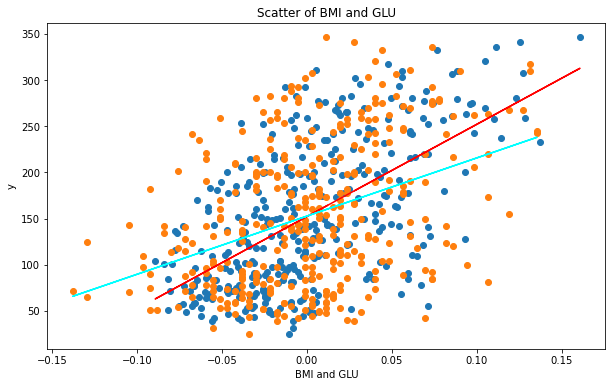

In [77]:
bmi = x_train_normal[:, np.newaxis, 2]
glu = x_train_normal[:, np.newaxis, 9]

y = y_train_normal[:, np.newaxis]

bmi_linear_regression = LinearRegression().fit(bmi, y_train_normal)
bmi_predicted_y = bmi_linear_regression.predict(bmi)

glu_linear_regression = LinearRegression().fit(glu, y_train_normal)
glu_predicted_y = glu_linear_regression.predict(glu)

# Plotting of the regression line on a scatterd plot
plt.figure(figsize=(10,6))
plt.scatter(bmi, y_train_normal)
plt.scatter(glu, y_train_normal)
plt.plot(bmi, bmi_predicted_y, c='r')
plt.plot(glu, glu_predicted_y, c='cyan')
plt.title('Scatter of BMI and GLU')
plt.ylabel('y')
plt.xlabel('BMI and GLU')
plt.show()

In [78]:
def select_features(train_data, y_data, test_data, n_features='all', regression=True):
    score_function = f_regression
    if (regression):
        score_function = chi2

    k_best = SelectKBest(score_func=score_function, k=n_features)
    k_best.fit(train_data, y_data)
    
    x_train_k_best = k_best.transform(train_data)
    x_test_k_best = k_best.transform(test_data)

    return x_train_k_best, x_test_k_best, k_best

def plot_k_best_score(scores):
    plt.bar([i for i in range(len(scores))], scores)
    plt.title('Score value of each feature')
    plt.xlabel('Feature')
    plt.ylabel('Score')
    plt.show()

def pca_features(dataset, transform, n_features=5):
    pca = PCA(n_components=n_features).fit(dataset)

    transformed = pca.transform(transform)

    return transformed, pca

def plot_pca_variance(pca):
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title('PCA coverage features')
    plt.xlabel('Features')
    plt.ylabel('Coverage')
    plt.show()

def print_percent_correct(predicted, test):
    print('Percentage correct:', 100*np.sum(predicted == test) / len(test))

def plot_matrix(title, matrix):
    cmap = ListedColormap(['darkorange', 'gold', 'blue', 'red'])

    plt.figure()
    plt.matshow(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(x=j, y=i, s=matrix[i,j], va='center', ha='center')
    
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

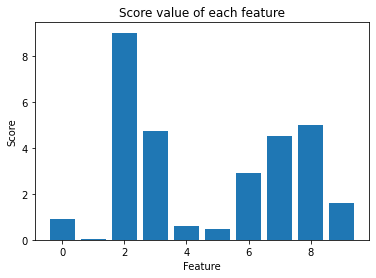

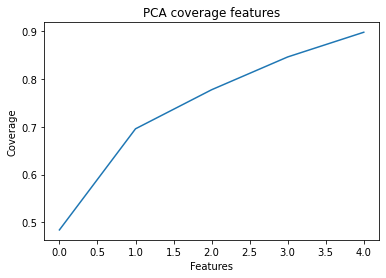

In [79]:
features = 5

x_trainset_features = x_train_standarized_labeled
y_trainset_features = y_train_labaled
x_testset_features = x_test_standarized_labeled

x_train_k_best, x_test_k_best, k_best = select_features(x_trainset_features, y_trainset_features, x_testset_features, n_features=features)
plot_k_best_score(k_best.scores_)

transformed, pca = pca_features(dataset=x_trainset_features, transform=x_trainset_features, n_features=features)
x_train_pca = transformed
transformed, pca = pca_features(dataset=x_trainset_features, transform=x_testset_features, n_features=features)
x_test_pca = transformed
plot_pca_variance(pca)

# VERY IMPORTANT! SET TRAINING DATA HERE!
x_train = x_train_k_best
x_test = x_test_k_best
y_train = y_train_labaled
y_test = y_test_labaled

<Figure size 432x288 with 0 Axes>

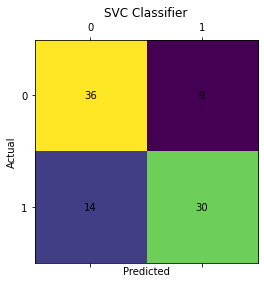

Percentage correct: 74.15730337078652


<Figure size 432x288 with 0 Axes>

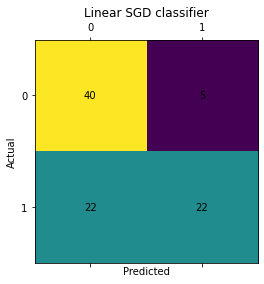

Percentage correct: 69.66292134831461


In [80]:
predicter = Sequential()

predicter.add(Dense(units=features*2, activation='relu', input_dim=features, name='Input'))
predicter.add(Dense(units=10, activation='relu', name='Hidden1'))
predicter.add(Dense(units=5, activation='relu', name='Hidden2'))
predicter.add(Dense(units=1, activation='sigmoid', name='Output'))

predicter.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

svc_clf = SVC(random_state=42,kernel='rbf', C=2200, gamma=0.0001)
svc_clf.fit(x_train, y_train)
y_pred_svc = svc_clf.predict(x_test)
svc_clf.get_params

# Confusion matrix SVC
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_svc)
plot_matrix('SVC Classifier', cm)
print_percent_correct(y_pred_svc, y_test)

# Linear SDG classifier using SVM(Support venctor machine)
sgd_clf = SGDClassifier(random_state=42, max_iter=2000, tol=0.001)
sgd_clf.fit(x_train, y_train)
y_pred_sdg = sgd_clf.predict(x_test)

# Confusion matrix SGD
cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred_sdg)
plot_matrix('Linear SGD classifier', cm2)
print_percent_correct(y_pred_sdg, y_test)

In [81]:
history = predicter.fit(x = x_train, y = y_train, epochs=100, batch_size=64, shuffle=True, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
6/6 [==============================] - 0s 40ms/step - loss: 0.6814 - accuracy: 0.4986 - val_loss: 0.6717 - val_accuracy: 0.5056
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6781 - accuracy: 0.4986 - val_loss: 0.6690 - val_accuracy: 0.5056
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6748 - accuracy: 0.4986 - val_loss: 0.6663 - val_accuracy: 0.5056
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 0.6718 - accuracy: 0.4986 - val_loss: 0.6631 - val_accuracy: 0.5169
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6690 - accuracy: 0.4929 - val_loss: 0.6600 - val_accuracy: 0.5169
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6662 - accuracy: 0.5127 - val_loss: 0.6565 - val_accuracy: 0.5506
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6632 - accuracy: 0.5694 - val_loss: 0.6534 - val_accuracy: 0.5843
Epoch 8/100
6/6 [====

[0.6208926  0.10023543 0.1208128  0.6208926  0.35003674 0.6149572
 0.20439947 0.36154604 0.6208926  0.01255181 0.18444347 0.09657472
 0.6208926  0.6208926  0.6019974  0.03969082 0.6208926  0.12847108
 0.03703573 0.28735137 0.05301452 0.05815443 0.1269322  0.56306803
 0.5839413  0.33815992 0.13561675 0.0223501  0.06139818 0.29314262
 0.37941802 0.6208926  0.58181673 0.2336798  0.6052185  0.46641946
 0.6208926  0.3973567  0.08141011 0.5377677  0.6208926  0.45007393
 0.6208926  0.2488266  0.16206372 0.6208926  0.40344614 0.32525286
 0.6208926  0.13221836 0.6208926  0.04088369 0.3879195  0.10639653
 0.5056295  0.36890703 0.6208926  0.02442673 0.36103183 0.15937266
 0.6208926  0.5838317  0.34666538 0.5907665  0.28508782 0.37798846
 0.6208926  0.09510046 0.21939415 0.49944967 0.12040773 0.6208926
 0.6208926  0.09101152 0.5548125  0.60010505 0.6208926  0.14014888
 0.20643091 0.5902024  0.11284149 0.03681281 0.0921506  0.6208926
 0.43932208 0.57783335 0.06268445 0.6208926  0.48693866]
[1. 0. 0

<Figure size 432x288 with 0 Axes>

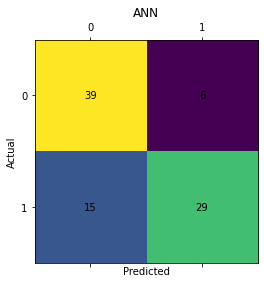

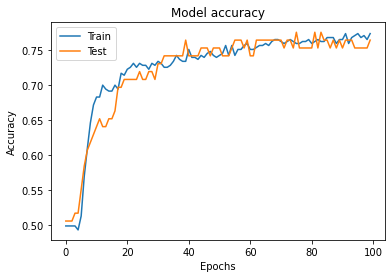

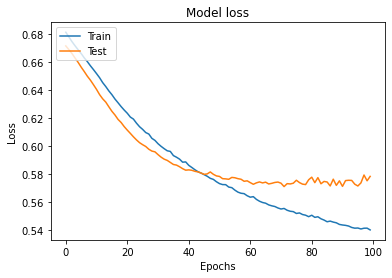

In [82]:
pr = predicter.predict(x_test)
pr_reformed = pr[:,0]
print(pr_reformed)
pr_transformed = np.zeros(len(pr))
pr_transformed[pr_reformed > 0.5] = 1
print(pr_transformed)

ann_cm = confusion_matrix(y_true=y_test, y_pred=pr_transformed)
plot_matrix('ANN', ann_cm)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

accuracy:  74.15730337078652


<Figure size 432x288 with 0 Axes>

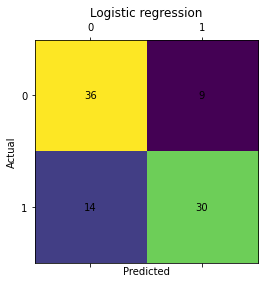

In [83]:
model = LogisticRegression(penalty = 'l2', random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('accuracy: ',accuracy_score(y_test, ypred)*100)

cm = confusion_matrix(y_test, y_pred)
plot_matrix("Logistic regression", cm)

76.40449438202246


<Figure size 432x288 with 0 Axes>

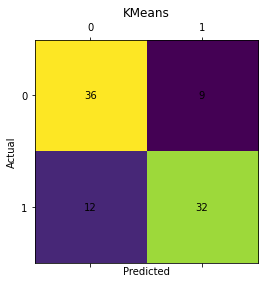

In [84]:
k_means = KMeans(n_clusters=2, max_iter=100, algorithm='auto', random_state=42, verbose=0)
k_means.fit(x_train)
k_means_predicted = k_means.predict(x_test)
print(accuracy_score(y_test, k_means_predicted)*100)
k_means_cm = confusion_matrix(y_true=y_test, y_pred = k_means_predicted)
plot_matrix('KMeans', k_means_cm)